In [5]:
!pip install mglearn

In [7]:
from sklearn.model_selection import train_test_split
from mglearn.datasets import load_extended_boston

X, y = load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

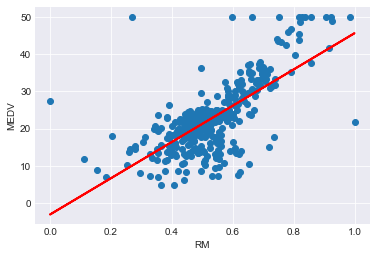

In [12]:
import matplotlib.pyplot as plt
from sklearn import linear_model
plt.style.use('seaborn-darkgrid')

X_train_single = X_train[:,5].reshape(-1,1)
X_test_single = X_test[:,5].reshape(-1,1)



lm_single=linear_model.LinearRegression()
lm_single.fit(X_train_single,y_train)

y_pred_train=lm_single.predict(X_train_single)

plt.xlabel('RM')
plt.ylabel('MEDV')
plt.scatter(X_train_single, y_train)
plt.plot(X_train_single, y_pred_train, color='red', linewidth=2)
plt.show()

In [13]:
print(f'intercept:{lm_single.intercept_:.2f}')#切片,バイアスパラメータ
print(f'coef:{lm_single.coef_[0]:.2f}')#傾き,重みパラメータ

intercept:-3.02
coef:48.60


In [28]:
print(f'Train score{lm_single.score(X_train_single, y_train):.2f}')
#print('Train score{}'.format(lm_single.score(X_train_single, y_train):.2f))
print(f'Test score:{lm_single.score(X_test_single, y_test):.2f}')

Train score0.49
Test score:0.47


重回帰モデル

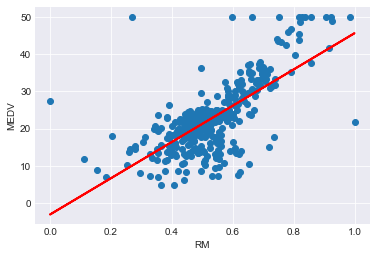

intercept:30.93
coef:[-412.7109467   -52.24320682 -131.89881469  -12.00413648]
Train score0.95
Test score:0.61


In [35]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)


print(f'intercept:{lm.intercept_:.2f}')
print(f'coef:{lm.coef_[:4]}')

print(f'Train score{lm.score(X_train, y_train):.2f}')
print(f'Test score:{lm.score(X_test, y_test):.2f}')

過学習の抑制

In [38]:
#+a(w0^2+w1^2)
ridge = linear_model.Ridge(alpha=1.0, random_state=0)
ridge.fit(X_train, y_train) 

print(f'intercept:{ridge.intercept_:.2f}')
print(f'coef:{ridge.coef_[:4]}')

print(f'Train score:{ridge.score(X_train, y_train):.2f}')
print(f'Test score:{ridge.score(X_test,y_test):.2f}')

intercept:21.39
coef:[-1.41368408 -1.55661895 -1.46543409 -0.12661607]
Train score:0.89
Test score:0.75


In [42]:
#+a(|w|+|w1|)

import numpy as np

lasso = linear_model.Lasso(alpha=0.01, max_iter=2000, random_state=0)
lasso.fit(X_train, y_train)

print(f'Number of nonzero parameters:{np.count_nonzero(lasso.coef_)}')
print(f'Train score :{lasso.score(X_train, y_train):.2f}')
print(f'Test score:{lasso.score(X_test, y_test):.2f}')



Number of nonzero parameters:33
Train score :0.90
Test score:0.77
